In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
import numpy as np

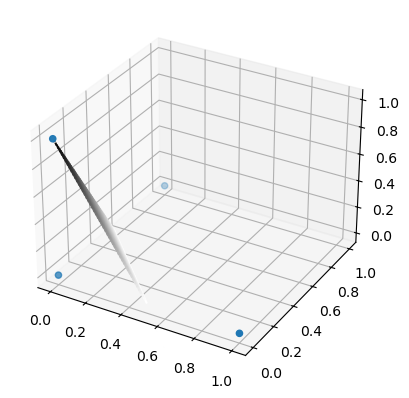

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

xvert = np.array([1, 0, 0, 0])
yvert = np.array([0, 1, 0, 0])
zvert = np.array([0, 0, 1, 0])
ax.scatter3D(xvert, yvert, zvert)

x = np.linspace(0, 0.5, 51)
y = np.linspace(0, 0.5, 51)
X, Y = np.meshgrid(x, y)
Z = np.maximum(1 - 2*(X+Y), 0)
ax.contour3D(X, Y, Z, 50, cmap='binary')
    

In [18]:
normals = np.array([-2+3*X+2*Y, -2+4*X+3*Y, -1+2*X+2*Y, 1-X-Y])
normals_mod = normals.copy()
normals_mod[0:3,:,:] = normals_mod[0:3,:,:] - normals_mod[3,:,:]
normals_mod = normals_mod / normals_mod[2,:,:]
mask_normals = (X + Y <= 0.5)

x_tilde = np.linspace(0, 1, 101)
y_tilde = np.linspace(0, 1, 101)
X_tilde, Y_tilde = np.meshgrid(x_tilde, y_tilde)

Z_min, Z_max = np.empty((101, 101)), np.empty((101, 101))

for i in range(101):
    for j in range(101):
        z_values = np.where(mask_normals == 1, -normals_mod[3,:,:] - X_tilde[i, j]*normals_mod[0,:,:] - Y_tilde[i, j]*normals_mod[1,:,:], np.nan)
        z_values = np.where(z_values >= 0, z_values, np.nan)
        z_values = np.where(x_tilde[i] + y_tilde[j] + z_values <= 1, z_values, np.nan)
        Z_min[i, j] = np.nanmin(z_values, initial=2)
        Z_max[i, j] = np.nanmax(z_values, initial=-1)

In [19]:
Z_min, Z_max

(array([[5.00e-01, 4.85e-01, 4.70e-01, ..., 2.00e+00, 2.00e+00, 2.00e+00],
        [4.85e-01, 4.70e-01, 4.55e-01, ..., 2.00e+00, 2.00e+00, 2.00e+00],
        [4.70e-01, 4.55e-01, 4.40e-01, ..., 2.00e+00, 2.00e+00, 2.00e+00],
        ...,
        [4.00e-04, 0.00e+00, 2.00e+00, ..., 2.00e+00, 2.00e+00, 2.00e+00],
        [1.00e-02, 2.00e+00, 2.00e+00, ..., 2.00e+00, 2.00e+00, 2.00e+00],
        [0.00e+00, 2.00e+00, 2.00e+00, ..., 2.00e+00, 2.00e+00, 2.00e+00]]),
 array([[ 1.  ,  0.98,  0.96, ..., -1.  , -1.  , -1.  ],
        [ 0.99,  0.97,  0.95, ..., -1.  , -1.  , -1.  ],
        [ 0.98,  0.96,  0.94, ..., -1.  , -1.  , -1.  ],
        ...,
        [ 0.02,  0.  , -1.  , ..., -1.  , -1.  , -1.  ],
        [ 0.01, -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
        [ 0.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ]]))

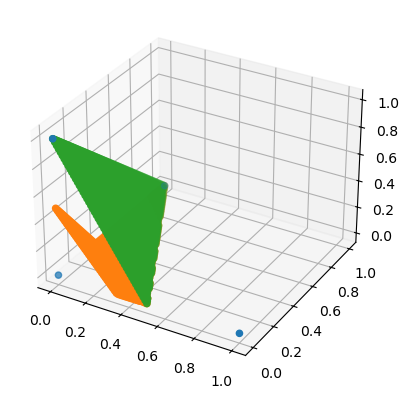

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')

xvert = np.array([1, 0, 0, 0])
yvert = np.array([0, 1, 0, 0])
zvert = np.array([0, 0, 1, 0])
ax.scatter(xvert, yvert, zvert)

x = np.linspace(0, 0.5, 51)
y = np.linspace(0, 0.5, 51)
X, Y = np.meshgrid(x, y)
Z = np.maximum(1 - 2*(X+Y), 0)
# ax.contour3D(X, Y, Z, 50, cmap='binary')
# ax.contour3D(X_tilde, Y_tilde, Z_min, 50)
# ax.contour3D(X_tilde, Y_tilde, Z_max, 50)

mask = (Z_max >= 0)
xflat = X_tilde[mask].flatten()
yflat = Y_tilde[mask].flatten()
zflat_min = Z_min[mask].flatten()
zflat_max = Z_max[mask].flatten()

ax.scatter(xflat, yflat, zflat_min)
ax.scatter(xflat, yflat, zflat_max)

In [ ]:
normals[:, 0, 50], X[0, 50], Y[0, 50], x[0]

(array([-0.5,  0. ,  0. ,  0.5]), 0.5, 0.0, 0.0)